# Netflix Stock Price Prediction

Goal of the following exercise is to predict Netflix stock price using Linear Regression. 

The dataset contains data for 5 years and the following columns:

* Date
* Open
* High
* Low
* Close
* Adj Close
* Volume

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading

In [6]:
df = pd.read_csv('NFLX.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## Data Preparation

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

** no null values **

In [13]:
df.shape

(1009, 7)

** 1009 rows 7 columns **

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


## Train and Test Set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(df, test_size=0.2)

In [22]:
test_pred = test.copy()

In [24]:
x_train = train[['Open','High','Low','Volume']].values
x_test = test[['Open','High','Low','Volume']].values

In [25]:
y_train = train['Close'].values
y_test = test['Close'].values

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model_lr.predict(x_test)

In [30]:
# Example

result = model_lr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.3870137]


## Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [32]:
print("MSE", round(mean_squared_error(y_test,y_pred), 3))
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE", round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE", round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 17.731
RMSE 4.211
MAE 3.081
MAPE 0.008
R2 Score :  0.998


## Model Visualization 

In [33]:
import seaborn as sns

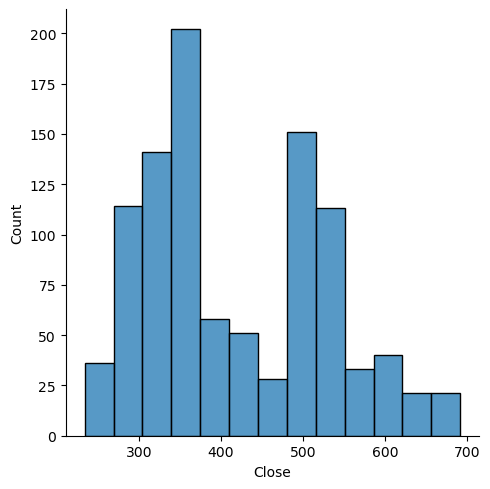

In [36]:
sns.displot(df['Close'])

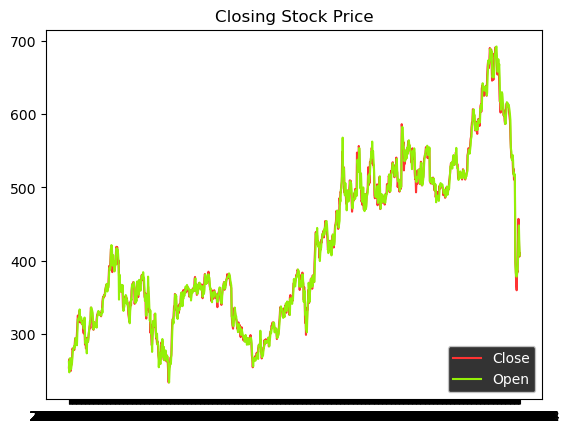

In [46]:
plt.title('Closing Stock Price', color="black")
plt.plot(df.Date, df.Close, color="#FF3333")
plt.plot(df.Date, df.Open, color="#94F008")
plt.legend(["Close","Open"], loc ="lower right", facecolor='black', labelcolor='white')